In [1]:
%reset
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_boston
from sklearn import preprocessing
import seaborn as sns
from numpy import dot
np.random.seed(678)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# create the first data
data_1 = np.array([
    [3,1,1],
    [-1,3,1]
])

w_1_1 = data_1.dot(data_1.T)
e_value_1_1,e_vector_1_1 = np.linalg.eig(w_1_1)
e_value_1_1 = e_value_1_1.real
e_vector_1_1 = e_vector_1_1.real

w_1_2 = data_1.T.dot(data_1)
e_value_1_2,e_vector_1_2 = np.linalg.eig(w_1_2)
e_value_1_2 = e_value_1_2.real
e_vector_1_2 = e_vector_1_2.real

print("Original Data Shape: ", data_1.shape)
print('dot(A,A.T) Eigen Value: ',e_value_1_1.shape)
print('dot(A,A.T) Eigen Vector: ',e_vector_1_1.shape)
print('dot(A.T,A) Eigen Value: ',e_value_1_2.shape)
print('dot(A.T,A) Eigen Vector: ',e_vector_1_2.shape)

print(e_value_1_1)
print(e_vector_1_1)
print(e_value_1_2)
print(e_vector_1_2)

Original Data Shape:  (2, 3)
dot(A,A.T) Eigen Value:  (2,)
dot(A,A.T) Eigen Vector:  (2, 2)
dot(A.T,A) Eigen Value:  (3,)
dot(A.T,A) Eigen Vector:  (3, 3)
[12. 10.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[ 0. 10. 12.]
[[ 1.82574186e-01 -8.94427191e-01 -4.08248290e-01]
 [ 3.65148372e-01  4.47213595e-01 -8.16496581e-01]
 [-9.12870929e-01  5.07704275e-16 -4.08248290e-01]]


In [4]:
# Compute the Singular Value Matrix
rows_1_1 = np.nonzero(e_value_1_1)
rows_1_2 = np.nonzero(e_value_1_2)
non_zero_1_1 = e_value_1_1[rows_1_1].copy()
non_zero_1_2 = e_value_1_2[rows_1_2].copy()

print('Sqrt Root Sum of One : ',np.sqrt(non_zero_1_1**2).sum())
print('Sqrt Root Sum of Two : ',np.sqrt(non_zero_1_2**2).sum())

Sqrt Root Sum of One :  22.0
Sqrt Root Sum of Two :  21.999999999999993


------------------
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[3.16227766 0.         0.        ]
 [0.         3.46410162 0.        ]]
[[ 1.82574186e-01  3.65148372e-01 -9.12870929e-01]
 [-8.94427191e-01  4.47213595e-01  5.07704275e-16]
 [-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]]
------------------
[[ 3  1  1]
 [-1  3  1]]
[[ 2.59913852 -0.27894853 -2.04124145]
 [-1.78264194  1.9119417  -2.04124145]]


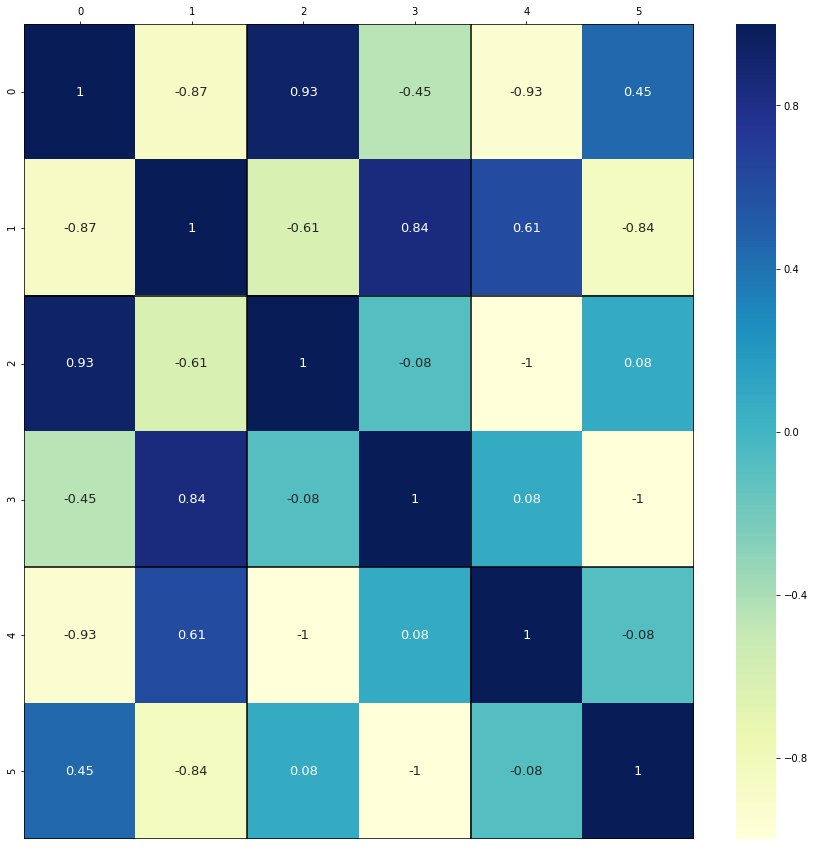

In [5]:
# Create each matrix
U_1 = e_vector_1_1
temp = np.diag(np.sqrt(non_zero_1_2))
S_1 = np.zeros_like(data_1).astype(np.float64)
S_1[:temp.shape[0],:temp.shape[1]] = temp
V_1 = e_vector_1_2.T

print('------------------')
print(U_1)
print(S_1)
print(V_1)

print('------------------')
reconstructed_1 = dot(U_1,S_1).dot(V_1)

print(data_1)
print(reconstructed_1)

df_1 = pd.DataFrame(np.hstack((data_1.T,reconstructed_1.T,-reconstructed_1.T)))
plt.figure(figsize=(15,15))
ax = sns.heatmap(np.around(df_1.corr(),2),annot=True,annot_kws={"size": 13},cmap="YlGnBu")
ax.xaxis.tick_top()
ax.vlines([0,2,4,6], *ax.get_ylim())
ax.hlines([0,2,4,6], *ax.get_xlim())

In [8]:
A = np.array([
    [3,1,1],
    [-1,3,1]
])

temp = A.dot(A.T)
print(temp.shape)

S,U = np.linalg.eig(temp)
S = np.diag(np.sqrt(S))

V = A.T.dot(U).dot(np.linalg.inv(S))
print(V.shape)
print(U.dot(S).dot(V.T))

print(U)
print(S)
print(V)

(2, 2)
(3, 2)
[[ 3.  1.  1.]
 [-1.  3.  1.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[3.46410162 0.        ]
 [0.         3.16227766]]
[[ 0.40824829 -0.89442719]
 [ 0.81649658  0.4472136 ]
 [ 0.40824829  0.        ]]
